<a href="https://colab.research.google.com/github/Natan1995/RNN_Deep_Learning/blob/main/Proyecto_Final/Proyecto_Final_RNN_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Redes Neuronales y Deep Learning - Proyecto Final<br>
---
### Integrantes:

1. Integrante 1: Gary Natanael Córdova Delgado<br>
2. Integrante 2: Jose Andre Zuñiga Cazorla<br>
3. Integrante 3: César Risco Chavez<br>
---
### Tematica
- Hacer uso de distintas estrategias de redes neuronales para poder indentificar y clasificar distintos tipos de vegetales.

- Url del dataset: [Dataset Kaggle](https://www.kaggle.com/datasets/misrakahmed/vegetable-image-dataset)

---



                                        

In [ ]:
!apt-get install texlive texlive-xetex texlive-latex-extra pandoc
!pip install pypandoc

In [ ]:
!pip install --upgrade --force-reinstall --no-deps kaggle

---

# Ambientación del proyecto

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sympy import symbols, diff

import random
import itertools
import math
import warnings

from google.colab import drive
import os

In [ ]:
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)
pd.set_option("display.max_colwidth",200)
pd.set_option("expand_frame_repr", True)
pd.set_option("max_info_columns", 200)
pd.set_option("display.float_format", '{:.2f}'.format )
#pd.set_option("precision", 2)

In [ ]:
plt.rcParams["figure.figsize"] = (30,10)

In [ ]:
warnings.filterwarnings('ignore')

In [ ]:
# Permite ajustar la anchura de la parte útil de la libreta (reduce los márgenes)
from IPython.core.display import display, HTML
display(HTML("<style>.container{ width:98% }</style>"))

In [ ]:
# Montamos la unidad de Drive
drive.mount('/content/drive')
base_folder = '/content/drive/My Drive/Proyecto_Final/'

Mounted at /content/drive


In [ ]:
# Establecemos semilla para garantizar reproducibilidad de resultados
np.random.seed(42)

In [ ]:
#Definimos las rutas donde se guardaran los datos
train_path = "data/Vegetable Images/train"
validation_path = "data/Vegetable Images/validation"
test_path = "data/Vegetable Images/test"

# Metodos de Apoyo

In [ ]:
# Funcion para cargar los datos de Kaggle en nuestro directorio
def upload_data():

  # Cargamos el archivo json de Kaggle
  !mkdir ~/.kaggle
  !cp kaggle.json ~/.kaggle/
  !chmod 600 ~/.kaggle/kaggle.json

  #Descargamos el dataset del proyecto
  !kaggle datasets download -d misrakahmed/vegetable-image-dataset

  # Creemos un directorio para descomprimir los datos
  !mkdir data

  # Descomprimimos los datos y los dejamos listos para trabajar
  !unzip vegetable-image-dataset.zip -d data

In [ ]:
# Metodos complementario que utilizaremos para mostrar las imagenes de cierto path especificado
def plotVegetables(path):
  image_categories = os.listdir(path)
  return image_categories

def plot_images(path):

    image_categories = plotVegetables(path)
    plt.figure(figsize=(12, 12))
    for i, cat in enumerate(image_categories):

        # Cargamos imagenes
        image_path = path + '/' + cat
        images_in_folder = os.listdir(image_path)
        first_image_of_folder = images_in_folder[0]
        first_image_path = image_path + '/' + first_image_of_folder
        img = load_img(first_image_path)
        img_arr = img_to_array(img)/255.0

        # Create el grafico
        plt.subplot(4, 4, i+1)
        plt.imshow(img_arr)
        plt.title(cat)
        plt.axis('off')

    plt.show()

# Carga de Datos

In [ ]:
%%capture
upload_data() #Cargamos los datos en nuestro directorio

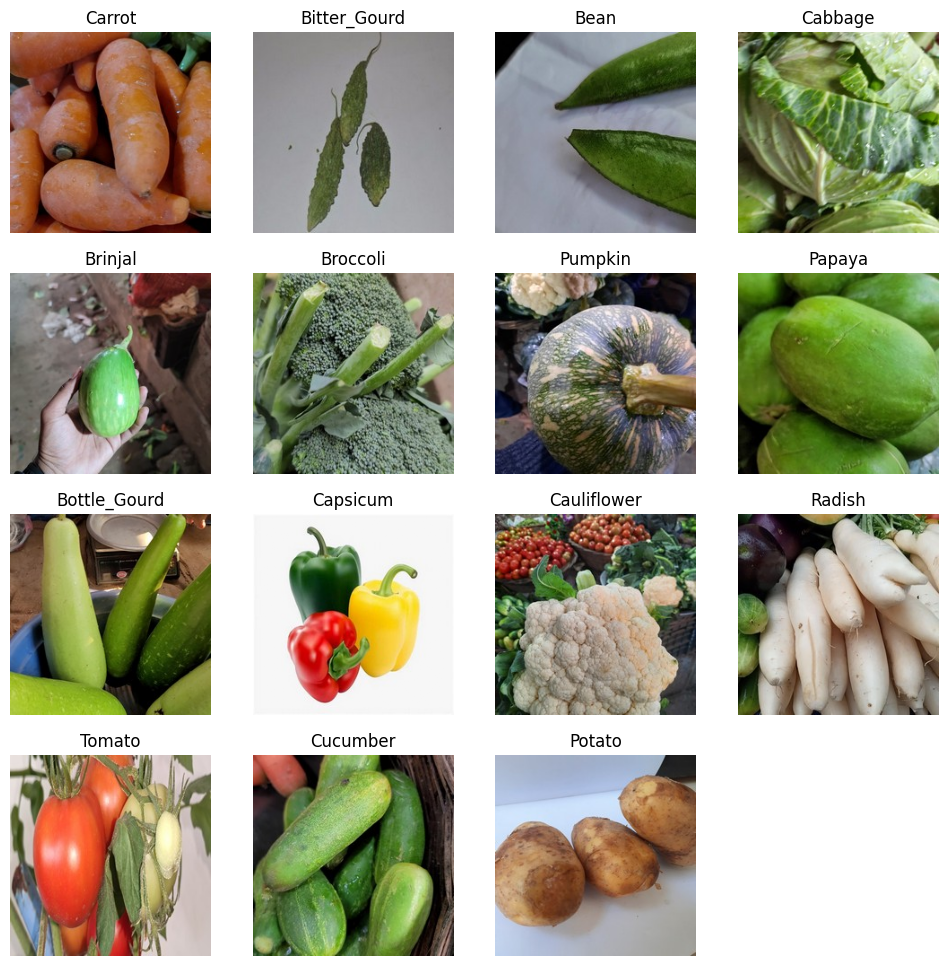

In [ ]:
# Ploteamos una muestra de las imagenes de los vegetales que tenemos en nuestra carpeta train
plot_images(train_path)

# Exportar Notebook

In [ ]:
!cp '/content/drive/MyDrive/Colab Notebooks/Proyecto_Final_RNN_2023.ipynb' ./

In [ ]:
!jupyter nbconvert --to PDF "Proyecto_Final_RNN_2023.ipynb"

[NbConvertApp] Converting notebook Proyecto_Final_RNN_2023.ipynb to PDF
[NbConvertApp] Support files will be in Proyecto_Final_RNN_2023_files/
[NbConvertApp] Making directory ./Proyecto_Final_RNN_2023_files
[NbConvertApp] Writing 33290 bytes to notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: ['xelatex', 'notebook.tex', '-quiet']
[NbConvertApp] Running bibtex 1 time: ['bibtex', 'notebook']
[NbConvertApp] WARNING | bibtex had problems, most likely because there were no citations
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 1052836 bytes to Proyecto_Final_RNN_2023.pdf
